# Sarcasm detection through Logistic regression for headlines

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### Function to add a bias term to dataset

In [2]:
def append_bias_term(a):
    
    b = np.ones((a.shape[0],1))
    a = np.hstack((b, a))
    
    return a

### Function to calculate normalization parameters

In [3]:
def n_params(a):
    
    mean = np.mean(a, axis=0)
    standard_dev = np.std(a, axis=0)
    
    return mean, standard_dev

### Function to perform normalization on dataset

In [4]:
def n_feat(a, mean, standard_dev):
    
    a = (a - mean) / (standard_dev + 1e-8)
    
    return a

### Logistic Regression model

In [5]:
def h(a, Theta):
    
    b = 1.0/(1.0 + np.exp(-np.dot(a, Theta)))
    
    return b

In [6]:
def prediction_func(a, Theta, h, thresh=0.50):
    
    b = h(a, Theta)
    b = (b>thresh) * 1
    
    return b

### Batch gradient descent learning

In [20]:
def param_learn(a, b, theta, h, alpha, iter_max=300):
    iteration = 1
    J_store = []
    num = a.shape[0]
    
    while True:
        
        error = (h(a, theta) - b)
        J_store.append(1.0/(2*num) * np.sum(error**2))
        a_error = (a * error)
        theta = theta - alpha * np.mean(a_error, axis=0)[:,np.newaxis]
        
        if iteration > iter_max:
            break
        iteration += 1
        
    return theta, J_store

### Read in preprocessed dataset and perform split

In [9]:
dataset = pd.read_csv('Pre-processed_Sarcasm_Headlines_Dataset.csv')

x_1, x_2, y_1, y_2 = train_test_split(dataset['headline'], dataset['is_sarcastic'], test_size=0.2, random_state = 100)
x_11, x_22, y_11, y_22 =  train_test_split(x_1, y_1, test_size=0.2, random_state = 100)

### Apply vectorizer to train and test data

In [10]:
vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, analyzer='word',smooth_idf=True,use_idf=True)
X_1 = vectorizer.fit_transform(x_11) #Train
X_2 = vectorizer.transform(x_2) #Test
X_3 = vectorizer.transform(x_22) #validate

### Convert split data to dataframes and 2-D arrays

In [11]:
X_1 = pd.DataFrame(X_1.toarray())
print(X_1.shape)
X_2 = pd.DataFrame(X_2.toarray())
print(X_2.shape)
X_3 = pd.DataFrame(X_3.toarray())
print(X_3.shape)

y_1 = y_1[:, np.newaxis]
y_11 = y_11[:, np.newaxis]
y_2 = y_2[:, np.newaxis]
y_22 = y_22[:, np.newaxis]

(17093, 4223)
(5342, 4223)
(4274, 4223)


### Normalize training and testing data

In [12]:
mean, standard_dev = n_params(X_1)
x_1_norm = n_feat(X_1, mean, standard_dev)
x_2_norm = n_feat(X_2, mean, standard_dev)
x_3_norm = n_feat(X_3, mean, standard_dev)

### Appending bias term to data

In [13]:
x_1_norm_aug = append_bias_term(x_1_norm)
x_2_norm_aug = append_bias_term(x_2_norm)
x_3_norm_aug = append_bias_term(x_3_norm)

### Create storage for error rates

In [14]:
store_error_train = []
store_error_validate = []

### Run model for different alphas

alpha = 0.01
emprical error for training(in %) = 10.554
emprical error for validating(in %) = 16.963
alpha = 0.05
emprical error for training(in %) = 8.372
emprical error for validating(in %) = 17.618
alpha = 0.1
emprical error for training(in %) = 7.453
emprical error for validating(in %) = 18.203
alpha = 0.2
emprical error for training(in %) = 6.716
emprical error for validating(in %) = 18.952


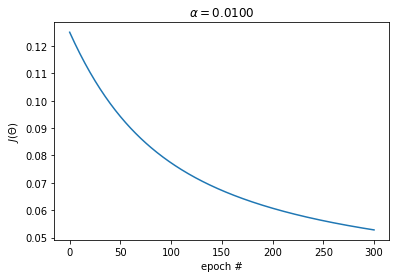

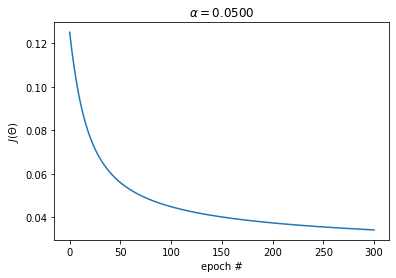

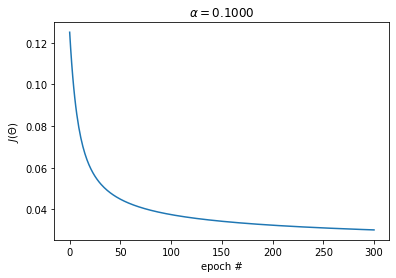

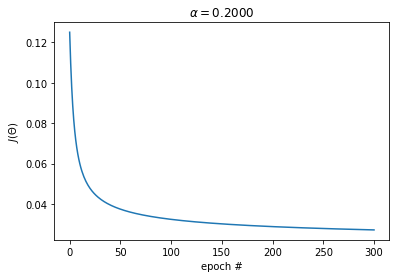

In [21]:
for c in [0.01, 0.05, 0.1, 0.2]:
    
    initial_thetas = np.zeros((x_1_norm_aug.shape[1],1))
    learnt_thetas, J = param_learn(x_1_norm_aug, y_11, initial_thetas, h, alpha=c)
    
    train_predict = prediction_func(x_1_norm_aug, learnt_thetas, h)
    test_predict = prediction_func(x_3_norm_aug, learnt_thetas, h)
    
    error_train = np.sum(y_11 != train_predict) / train_predict.shape[0]
    error_validate = np.sum(y_22 != test_predict) / test_predict.shape[0]
    
    store_error_train.append(error_train)
    store_error_validate.append(error_validate)
    
    print('alpha = {}'.format(c))
    print('emprical error for training(in %) = {:.3f}'.format(error_train*100))
    print('emprical error for validating(in %) = {:.3f}'.format(error_validate*100))

    plt.figure()
    plt.plot(np.arange(len(J)), J)
    plt.xlabel('epoch #')
    plt.ylabel(r'$J(\Theta)$')
    plt.title(r'$\alpha={:.4f}$'.format(c));

### Choose alpha that gives the lowest error and run model

In [28]:
initial_thetas = np.zeros((x_1_norm_aug.shape[1],1))
learnt_thetas, J = param_learn(x_1_norm_aug, y_11, initial_thetas, h, alpha=0.01)
    
train_predict = prediction_func(x_1_norm_aug, learnt_thetas, h)
test_predict = prediction_func(x_2_norm_aug, learnt_thetas, h)

### Confusion matrix

In [29]:
cm = confusion_matrix(y_2, test_predict)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[2495  511]
 [ 441 1895]]


### Accuracy

In [30]:
ac = accuracy_score(y_2,test_predict)
print ("Accuracy : ", ac)

Accuracy :  0.8217895919131412


### Recall

In [31]:
rs = recall_score(y_2, test_predict)
print("Recall: ", rs)

Recall:  0.8112157534246576


### Precision

In [32]:
ps = precision_score(y_2, test_predict)
print("Precision: ", ps)

Precision:  0.78761429758936


### f1_score

In [33]:
f1 = f1_score(y_2, test_predict)
print("f1_score: ", f1)

f1_score:  0.7992408266554197
